In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os

# Sklearn Preprocessing & Feature Selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from scipy import stats

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [4]:
import os
print(os.listdir(r"C:\Users\anagh\OneDrive\Documents\WECs_DataSet"))


['Adelaide_Data.csv', 'Perth_Data.csv', 'Sydney_Data.csv', 'Tasmania_Data.csv']


In [5]:
# Folder path where the dataset is stored
folder_path = r"C:\Users\anagh\OneDrive\Documents\WECs_DataSet"

# List all CSV files
csv_files = ["Adelaide_Data.csv", "Perth_Data.csv", "Sydney_Data.csv", "Tasmania_Data.csv"]

# Load and combine all CSV files into one DataFrame
df_list = [pd.read_csv(os.path.join(folder_path, file), header=None) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Display basic info
print("Dataset Shape:", df.shape)
print("Dataset Head:")
print(df.head())

Dataset Shape: (287999, 49)
Dataset Head:
         0         1         2         3         4         5         6   \
0  316.5855  223.9277  182.3434  551.5497    7.8641  243.1339  361.0877   
1  530.3136   68.7031   31.5983  175.2582  516.1441   63.4652   67.0954   
2   27.3967  399.0488  565.6854  394.0466  120.2245  558.1293  546.4520   
3  346.1526   59.6375  226.2742  280.9095  402.2161  218.7181  207.0407   
4  317.9144  551.8542  335.4745   40.0240  316.6285  365.6434  416.3060   

         7         8         9   ...          39          40          41  \
0  115.9284   78.6087  468.3799  ...  82322.0277  98069.1011  86578.6330   
1  369.4486   14.0930  375.4462  ...  83920.1033  80968.0044  87108.1328   
2   27.3256  314.1051  235.9476  ...  97358.7395  93437.7170  69940.2554   
3  339.5676    0.0000    0.0000  ...  80399.3841  89349.6141  85048.3860   
4  562.1028  211.3577  143.1255  ...  97088.1761  81187.3982  63591.6729   

           42          43          44          45 

In [6]:
# Assign column names 
df.columns = [f"col_{i}" for i in range(df.shape[1])]

In [7]:
# 1. Statistical Summary
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
               col_0          col_1          col_2          col_3  \
count  287999.000000  287999.000000  287999.000000  287999.000000   
mean      303.361390     288.828986     285.471335     270.258093   
std       190.112347     186.198477     191.487051     190.182035   
min         0.000000       0.000000       0.000000       0.000000   
25%       125.808200     118.254850     101.479600      91.722700   
50%       325.988400     295.566300     295.350400     261.205500   
75%       480.899700     459.107900     461.863200     444.303700   
max       566.000000     566.000000     566.000000     566.000000   

               col_4          col_5          col_6          col_7  \
count  287999.000000  287999.000000  287999.000000  287999.000000   
mean      308.392264     259.016305     267.693805     281.439988   
std       183.753901     195.598351     188.489448     182.806890   
min         0.000000       0.000000       0.000000       0.000000   
25%       14

In [8]:
# 2. Check Skewness
print("\nSkewness of Each Column:")
print(df.skew())


Skewness of Each Column:
col_0    -0.142212
col_1    -0.036775
col_2    -0.052412
col_3     0.066325
col_4    -0.196147
col_5     0.174561
col_6     0.107393
col_7     0.007731
col_8     0.047740
col_9     0.017476
col_10    0.025052
col_11    0.039680
col_12    0.040553
col_13   -0.001206
col_14   -0.057562
col_15   -0.102918
col_16   -0.042884
col_17   -0.034136
col_18    0.121961
col_19   -0.098884
col_20   -0.009413
col_21   -0.125333
col_22   -0.032978
col_23    0.091943
col_24   -0.033585
col_25   -0.104311
col_26    0.001775
col_27   -0.038955
col_28    0.121243
col_29    0.085712
col_30   -0.060958
col_31    0.052778
col_32    1.241268
col_33    1.228971
col_34    1.258014
col_35    1.259619
col_36    1.241966
col_37    1.256941
col_38    1.261179
col_39    1.252903
col_40    1.252882
col_41    1.243292
col_42    1.246510
col_43    1.247629
col_44    1.246020
col_45    1.241761
col_46    1.242849
col_47    1.236743
col_48    1.155834
dtype: float64


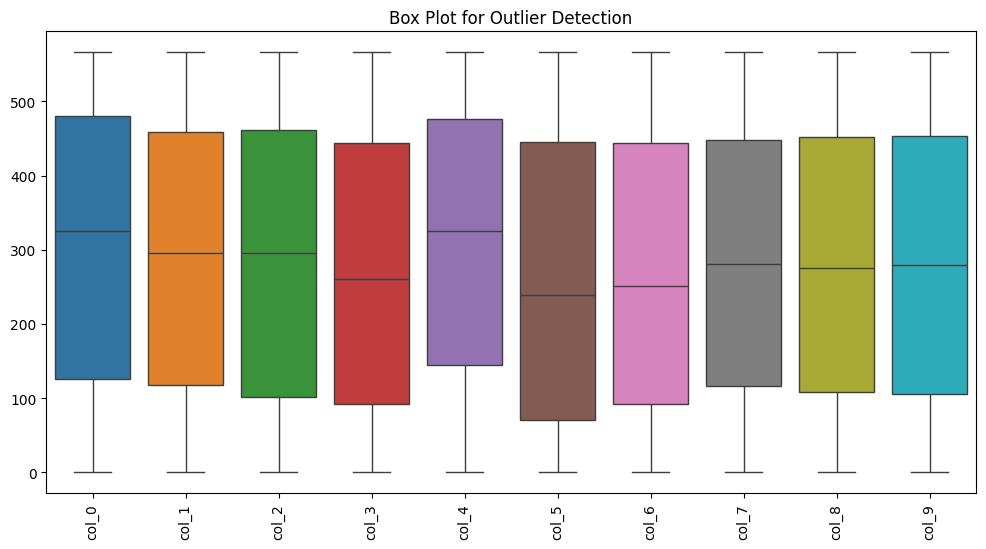

In [9]:
# 3. Detect Outliers using Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :10])  # Showing only first 10 columns for visibility
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection")
plt.show()

In [11]:
# 4. Apply IQR Method for Outlier Handling
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values (replace outliers with bounds)
df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

print("\nOutliers Handled using IQR Method!")


Outliers Handled using IQR Method!


In [12]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Series([], dtype: int64)


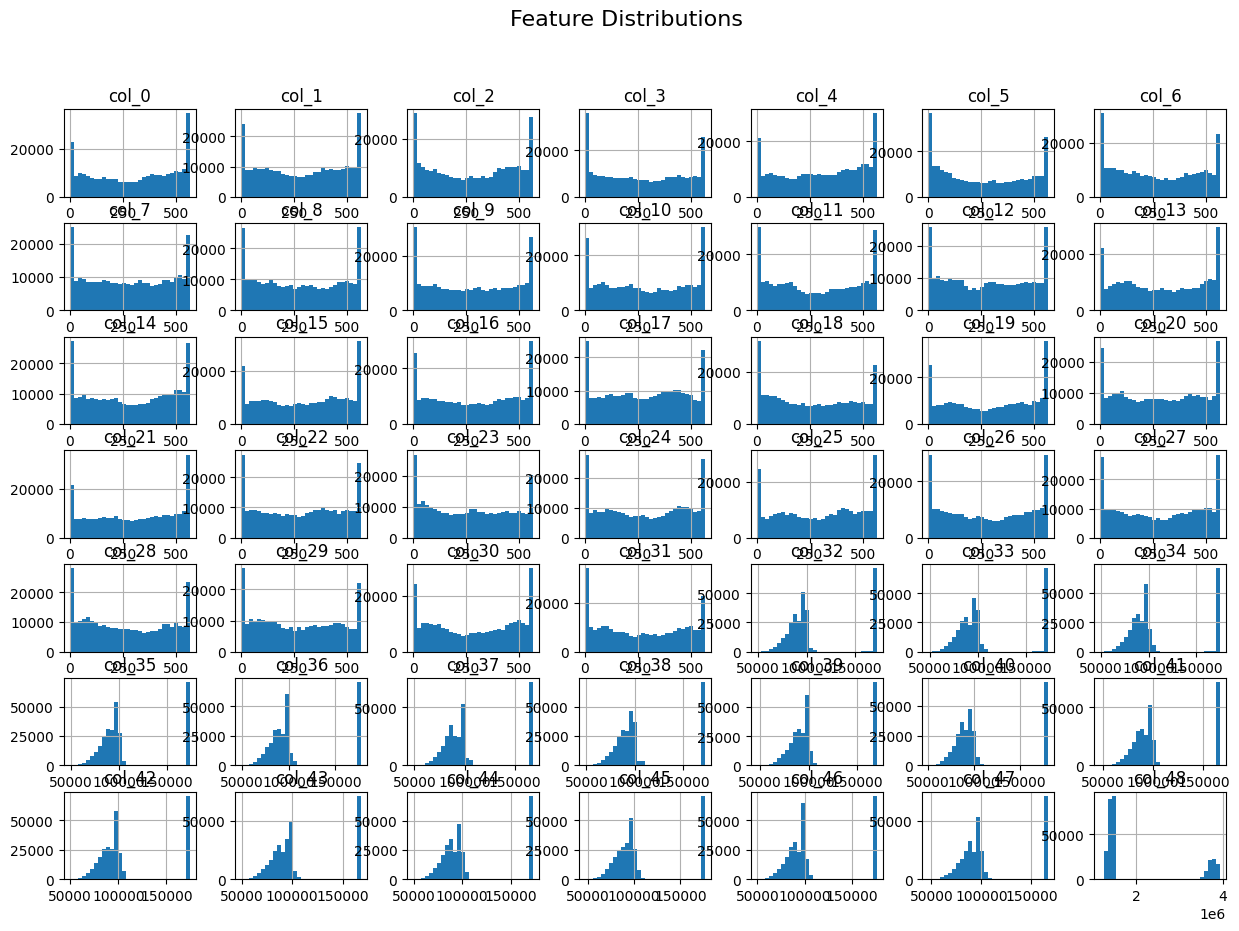

In [13]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


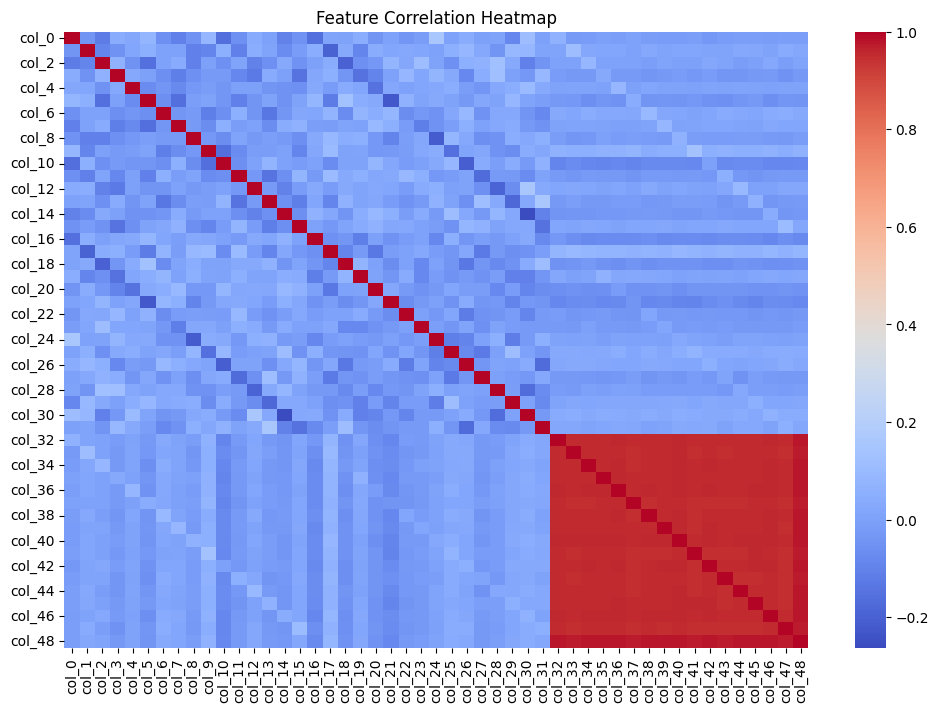

In [14]:
#correlation analysis
#Heatmap (to see correlations)

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


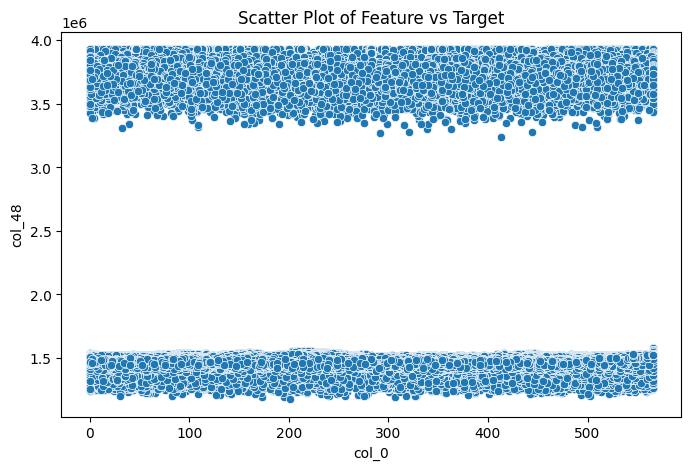

In [15]:
#Scatter Plot for Key Relationships
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, -1])  # First vs Last column
plt.title("Scatter Plot of Feature vs Target")
plt.show()


In [16]:
print(df.dtypes)


col_0     float64
col_1     float64
col_2     float64
col_3     float64
col_4     float64
col_5     float64
col_6     float64
col_7     float64
col_8     float64
col_9     float64
col_10    float64
col_11    float64
col_12    float64
col_13    float64
col_14    float64
col_15    float64
col_16    float64
col_17    float64
col_18    float64
col_19    float64
col_20    float64
col_21    float64
col_22    float64
col_23    float64
col_24    float64
col_25    float64
col_26    float64
col_27    float64
col_28    float64
col_29    float64
col_30    float64
col_31    float64
col_32    float64
col_33    float64
col_34    float64
col_35    float64
col_36    float64
col_37    float64
col_38    float64
col_39    float64
col_40    float64
col_41    float64
col_42    float64
col_43    float64
col_44    float64
col_45    float64
col_46    float64
col_47    float64
col_48    float64
dtype: object


In [17]:
#feature selection
# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Find features with correlation greater than 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
df_selected = df.drop(columns=to_drop)
print(f"Features dropped: {to_drop}")
print(f"New dataset shape: {df_selected.shape}")

Features dropped: ['col_33', 'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48']
New dataset shape: (287999, 33)


In [18]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)  # Scaling only selected features

# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)

# Display first 5 rows after scaling
df_scaled.head()


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32
0,0.069560,-0.348560,-0.538564,1.479068,-1.635496,-0.081199,0.495487,-0.905392,-1.072940,1.003964,...,0.014262,1.125999,-1.034666,-0.733544,-1.410579,1.225646,-1.464637,1.164406,-0.873422,-0.856309
1,1.193782,-1.182213,-1.325800,-0.499522,1.130600,-0.999760,-1.064244,0.481430,-1.418927,0.510476,...,-0.102326,0.697373,0.612376,-0.657859,1.296614,0.065940,1.584577,-0.438751,1.366209,-0.351020
2,-1.451590,0.591949,1.463360,0.650896,-1.024022,1.529223,1.478909,-1.390072,0.189988,-0.230278,...,1.271078,0.802170,-1.412934,-0.696562,-1.256463,0.265932,-1.335266,1.001872,0.459995,-0.905880
3,0.225084,-1.230901,-0.309145,0.056006,0.510596,-0.206026,-0.321786,0.317973,-1.494506,-1.483187,...,-0.275424,1.484008,0.272144,-1.470152,-0.075395,-0.483349,0.258622,-0.297700,-1.325074,-0.400664
4,0.076550,1.412609,0.261131,-1.210601,0.044822,0.545134,0.788439,1.535299,-0.361029,-0.723174,...,1.480169,-0.758763,-1.342178,-0.901207,0.476994,1.409298,1.057173,-1.310950,0.506366,-0.971697


In [19]:
print("Data Preprocessing Phase 1: Submission Completed Successfully!")


Data Preprocessing Phase 1: Submission Completed Successfully!
